In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [10]:
import peplearn as lp
from peplearn import data, features, plot

import sklearn

In [11]:
charge = lp.features.SequenceCharge("amino-acid-data-table.csv",12)
main_features = lp.features.SequenceMain("amino-acid-data-table.csv",12,use_sliding_windows=False,use_flip_pattern=False)

ml = lp.data.MachineLearnerData("enrich-in-p000.txt")
ml.add_feature(charge)
ml.add_feature(main_features)

weights = np.exp(-ml.training_values) # in this dataset, -log is good.

ValueError: could not broadcast input array from shape (80) into shape (2400)

n: 40, r2: 0.128
               pct_buried  6.05
                 engleman  5.15
      asa_sidechain_polar  5.00
                 cf_alpha  4.94
                   dS_exu  4.82
                  dS_buex  4.43
                knob_sc_b  4.38
          kyte_dootlittle  4.31
            asa_mainchain  4.12
              socket_mc_x  4.06
              socket_mc_y  3.93
            white_octanol  3.82
                  cf_turn  3.69
                     dSbb  3.56
                knob_mc_b  3.53
                  cf_beta  3.47
                   volume  3.31
                       mw  3.27
          white_interface  3.24
   asa_sidechain_nonpolar  3.20
              socket_mc_h  3.04
              socket_sc_y  2.97
            num_acceptors  2.49
               hoop_woods  2.39
              socket_sc_h  2.25
              socket_sc_x  2.23
               num_donors  1.74
                 aromatic  0.62
                    dummy  0.00


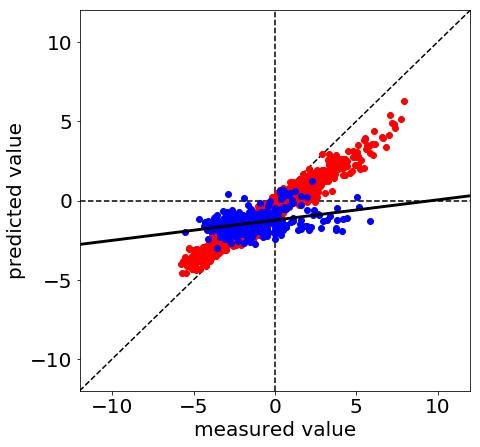

In [4]:
from sklearn import ensemble

fst = sklearn.ensemble.RandomForestRegressor(n_estimators=40)

fst.fit(ml.training_features, ml.training_values,sample_weight=weights) 
lp.plot.correlation(ml,fst)

print("n: {:d}, r2: {:.3f}".format(fst.n_estimators,fst.score(ml.test_features,ml.test_values)))

order = np.argsort(fst.feature_importances_)
order = order[::-1]
for i in order:
    print("{:>25s}{:6.2f}".format(ml.feature_names[i],100*fst.feature_importances_[i]))

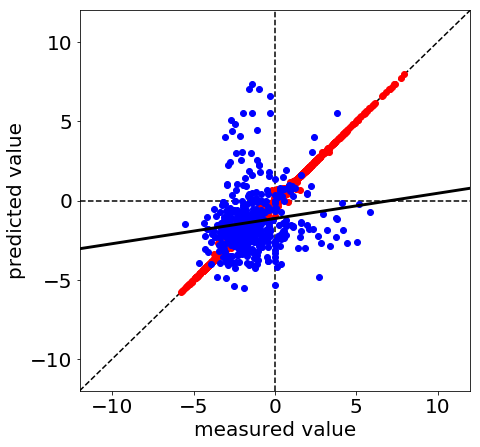

In [5]:
from sklearn import tree 

# UNCOMMENT YOUR FAVORITE DECISION TREE TO TRY

tre = sklearn.tree.DecisionTreeRegressor()
#tre = sklearn.tree.ExtraTreeRegressor()

tre.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,tre)

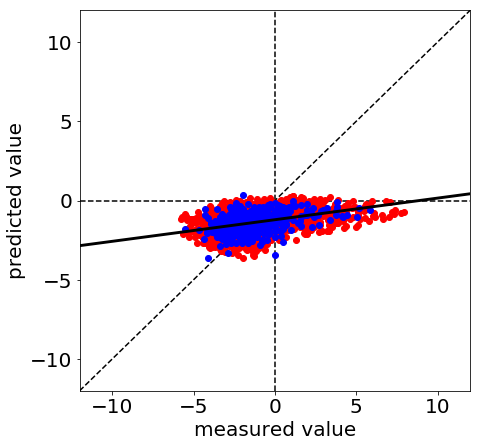

In [6]:
from sklearn import linear_model

# UNCOMMENT YOUR FAVORITE LINEAR MODEL TO TRY

clf = sklearn.linear_model.BayesianRidge(alpha_1=0.00001)
#clf = sklearn.linear_model.ElasticNet()
#clf = sklearn.linear_model.LassoLars(alpha=0.1)
#clf = sklearn.linear_model.Perceptron() # requires classes
#clf = sklearn.linear_model.PassiveAggressiveRegressor()
#clf = sklearn.linear_model.RANSACRegressor()
#clf = sklearn.linear_model.SGDRegressor()

clf.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,clf)

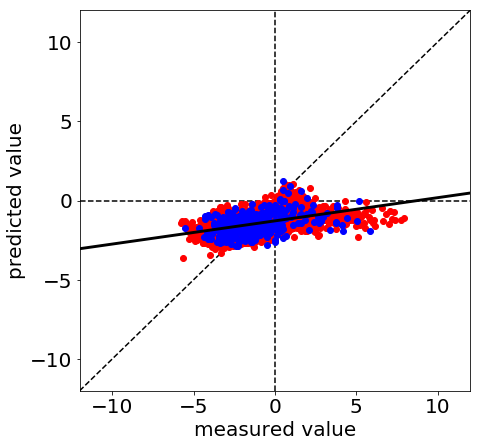

In [7]:
from sklearn import svm

# UNCOMMENT YOUR FAVORITE SUPPORT VECTOR MACHINE TO TRY

sv = sklearn.svm.SVR()
#sv = sklearn.svm.NuSVR()

sv.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,sv)